In [8]:
import numpy as np
import matplotlib.pyplot as plt
from openairclim.calc_swv import get_volume_matrix, get_griddata#,# construct_myhre_1m_df
from ambiance import Atmosphere
import pandas as pd

M_h2o = 18.01528 * 10**-3  # kg/mol
M_air = 28.97 * 10**-3  # kg/mol

In [9]:
def construct_myhre_1m_df(tropopause_value=1.772, cp_lat=87, cp_a=60, haloe_new = None):
    m16 = [
        [-86.307, 11.178],
        [-83.994, 11.189],
        [-81.734, 11.285],
        [-79.166, 11.415],
        [-77.118, 11.491],
        [-75.096, 11.590],
        [-73.075, 11.693],
        [-71.053, 11.796],
        [-69.031, 11.824],
        [-67.010, 11.824],
        [-64.988, 11.792],
        [-62.966, 11.824],
        [-60.945, 11.871],
        [-58.923, 11.950],
        [-56.902, 12.053],
        [-54.880, 12.160],
        [-52.858, 12.311],
        [-50.837, 12.540],
        [-48.815, 12.809],
        [-46.793, 13.114],
        [-44.772, 13.447],
        [-42.750, 13.807],
        [-40.728, 14.187],
        [-38.707, 14.575],
        [-36.685, 14.943],
        [-34.664, 15.247],
        [-32.642, 15.505],
        [-30.675, 15.747],
        [-28.838, 15.782],
        [-26.696, 15.996],
        [-24.494, 16.131],
        [-22.460, 16.369],
        [-20.512, 16.641],
        [-18.490, 17.021],
        [-16.469, 17.409],
        [-14.447, 17.864],
        [-12.426, 18.434],
        [-10.404, 19.027],
        [-8.382, 19.637],
        [-6.361, 19.973],
        [-4.339, 20.270],
        [-2.317, 20.448],
        [-0.296, 20.361],
        [1.726, 20.247],
        [3.747, 19.981],
        [5.769, 19.506],
        [7.791, 19.039],
        [9.812, 18.632],
        [11.834, 18.216],
        [13.856, 17.828],
        [15.877, 17.515],
        [17.899, 17.234],
        [19.921, 16.946],
        [21.666, 16.684],
        [23.710, 16.388],
        [25.756, 16.192],
        [28.067, 16.000],
        [30.580, 15.786],
        [32.602, 15.604],
        [34.623, 15.247],
        [36.645, 14.828],
        [38.667, 14.436],
        [40.688, 14.080],
        [42.710, 13.739],
        [44.731, 13.494],
        [46.753, 13.296],
        [48.775, 13.063],
        [50.796, 12.801],
        [52.818, 12.576],
        [54.840, 12.406],
        [56.861, 12.267],
        [58.883, 12.128],
        [60.905, 11.990],
        [62.926, 11.859],
        [64.948, 11.729],
        [66.969, 11.594],
        [68.991, 11.448],
        [71.013, 11.388],
        [73.034, 11.388],
        [75.056, 11.388],
        [76.940, 11.426],
        [78.778, 11.326],
        [83.067, 11.095],
        [80.731, 11.197],
        [85.348, 11.024],
        [86.543, 10.953],
    ]

    m14 = [
        [-86.307, 13.680],
        [-84.285, 13.731],
        [-82.264, 13.862],
        [-79.795, 14.045],
        [-77.107, 14.299],
        [-74.453, 14.495],
        [-72.339, 14.634],
        [-70.318, 14.836],
        [-68.296, 15.081],
        [-66.275, 15.342],
        [-64.253, 15.592],
        [-62.231, 15.774],
        [-60.210, 15.948],
        [-58.188, 16.126],
        [-56.166, 16.304],
        [-54.145, 16.478],
        [-52.123, 16.629],
        [-50.101, 16.779],
        [-48.080, 16.934],
        [-46.058, 17.092],
        [-44.037, 17.238],
        [-42.015, 17.385],
        [-39.993, 17.527],
        [-37.972, 17.682],
        [-35.950, 17.907],
        [-33.928, 18.264],
        [-31.907, 18.620],
        [-29.885, 19.016],
        [-27.864, 19.506],
        [-26.104, 20.044],
        [-24.721, 20.427],
        [-23.022, 20.947],
        [-21.461, 21.500],
        [-19.974, 22.162],
        [-17.663, 23.314],
        [-15.734, 24.292],
        [-13.712, 25.159],
        [-11.690, 25.800],
        [-9.669, 26.441],
        [-7.647, 26.896],
        [-5.626, 27.114],
        [-3.604, 27.316],
        [-1.582, 27.379],
        [0.439, 27.332],
        [2.461, 27.300],
        [4.483, 27.078],
        [6.504, 26.730],
        [8.526, 26.307],
        [10.548, 25.673],
        [12.569, 25.060],
        [14.591, 24.387],
        [16.612, 23.556],
        [18.634, 22.732],
        [20.472, 21.993],
        [22.297, 21.198],
        [24.216, 20.611],
        [26.103, 20.031],
        [28.114, 19.569],
        [30.212, 19.067],
        [32.234, 18.723],
        [34.256, 18.426],
        [36.277, 18.145],
        [38.299, 17.899],
        [40.321, 17.670],
        [42.342, 17.500],
        [44.364, 17.345],
        [46.386, 17.191],
        [48.407, 17.029],
        [50.429, 16.831],
        [52.450, 16.637],
        [54.472, 16.526],
        [56.494, 16.451],
        [58.515, 16.395],
        [60.537, 16.288],
        [62.559, 16.146],
        [64.580, 16.027],
        [66.602, 15.873],
        [68.623, 15.722],
        [70.645, 15.592],
        [72.667, 15.493],
        [74.482, 15.421],
        [76.342, 15.219],
        [78.275, 15.050],
        [80.669, 14.950],
        [82.959, 14.812],
        [84.980, 14.685],
        [86.703, 14.507],
    ]

    m12 = [
        [-86.123, 16.237],
        [-84.102, 16.391],
        [-82.141, 16.560],
        [-80.518, 16.679],
        [-78.533, 16.783],
        [-76.632, 16.976],
        [-74.618, 17.223],
        [-72.707, 17.310],
        [-70.685, 17.492],
        [-68.664, 17.781],
        [-66.642, 18.208],
        [-64.620, 18.640],
        [-62.599, 19.047],
        [-60.577, 19.546],
        [-58.556, 19.914],
        [-56.534, 20.298],
        [-54.512, 20.714],
        [-52.491, 21.038],
        [-50.469, 21.339],
        [-48.447, 21.644],
        [-46.426, 21.798],
        [-44.404, 21.893],
        [-42.383, 21.992],
        [-40.361, 22.206],
        [-38.339, 22.428],
        [-36.318, 22.716],
        [-34.296, 23.243],
        [-32.274, 23.813],
        [-30.253, 24.424],
        [-28.338, 25.016],
        [-26.582, 25.632],
        [-24.935, 26.229],
        [-23.046, 26.904],
        [-21.063, 27.704],
        [-19.042, 28.436],
        [-17.020, 29.224],
        [-14.999, 29.889],
        [-12.977, 30.257],
        [-10.955, 30.546],
        [-8.934, 30.823],
        [-6.912, 31.001],
        [-4.890, 31.116],
        [-2.869, 31.250],
        [-0.847, 31.306],
        [1.174, 31.329],
        [3.196, 31.298],
        [5.218, 31.163],
        [7.239, 31.029],
        [9.261, 30.823],
        [11.283, 30.502],
        [13.304, 30.182],
        [15.326, 29.778],
        [17.348, 29.133],
        [19.369, 28.408],
        [21.322, 27.642],
        [24.129, 26.292],
        [22.710, 26.960],
        [25.775, 25.532],
        [27.639, 24.854],
        [29.661, 24.114],
        [31.683, 23.469],
        [33.704, 22.938],
        [35.726, 22.471],
        [37.748, 22.127],
        [39.769, 21.858],
        [41.791, 21.588],
        [43.813, 21.367],
        [45.834, 21.153],
        [47.856, 20.951],
        [49.877, 20.726],
        [51.899, 20.512],
        [53.921, 20.270],
        [55.942, 20.061],
        [57.964, 19.843],
        [59.986, 19.609],
        [62.007, 19.348],
        [64.029, 19.095],
        [66.051, 18.869],
        [68.072, 18.679],
        [70.094, 18.481],
        [71.909, 18.420],
        [73.892, 18.240],
        [75.835, 18.078],
        [77.661, 17.995],
        [80.570, 17.765],
        [82.591, 17.646],
        [84.613, 17.539],
        [86.524, 17.553],
    ]

    m10 = [
        [-86.307, 18.743],
        [-84.285, 18.948],
        [-82.264, 19.210],
        [-80.242, 19.502],
        [-78.221, 19.819],
        [-76.199, 20.140],
        [-74.116, 20.464],
        [-72.156, 20.826],
        [-70.134, 21.181],
        [-68.112, 21.675],
        [-66.091, 22.253],
        [-64.069, 22.859],
        [-62.047, 23.548],
        [-60.026, 24.264],
        [-58.004, 24.913],
        [-55.983, 25.479],
        [-53.961, 26.148],
        [-51.939, 26.734],
        [-49.918, 27.217],
        [-47.896, 27.605],
        [-45.874, 27.815],
        [-43.853, 27.981],
        [-41.831, 28.163],
        [-39.810, 28.369],
        [-37.788, 28.586],
        [-35.766, 28.891],
        [-33.745, 29.307],
        [-31.723, 29.711],
        [-29.701, 30.063],
        [-27.680, 30.431],
        [-25.658, 30.811],
        [-23.774, 31.248],
        [-22.579, 31.683],
        [-20.512, 32.133],
        [-18.490, 32.644],
        [-16.469, 33.051],
        [-14.447, 33.451],
        [-12.426, 33.696],
        [-10.404, 33.898],
        [-8.382, 34.072],
        [-6.361, 34.223],
        [-4.339, 34.357],
        [-2.317, 34.472],
        [-0.296, 34.547],
        [1.726, 34.595],
        [3.747, 34.623],
        [5.769, 34.555],
        [7.791, 34.539],
        [9.812, 34.385],
        [11.834, 34.195],
        [13.856, 34.001],
        [15.877, 33.724],
        [17.899, 33.419],
        [19.921, 33.059],
        [21.942, 32.505],
        [23.964, 31.808],
        [25.985, 31.052],
        [27.915, 30.344],
        [29.372, 29.729],
        [30.837, 29.232],
        [32.602, 28.531],
        [34.623, 27.910],
        [36.645, 27.379],
        [38.667, 26.960],
        [40.688, 26.524],
        [42.710, 26.152],
        [44.731, 25.930],
        [46.753, 25.713],
        [48.775, 25.424],
        [50.796, 25.103],
        [52.818, 24.783],
        [54.840, 24.494],
        [56.861, 24.173],
        [58.883, 23.845],
        [60.905, 23.469],
        [62.926, 23.081],
        [64.948, 22.728],
        [66.969, 22.447],
        [68.991, 22.174],
        [71.013, 21.964],
        [73.034, 21.834],
        [75.056, 21.707],
        [77.078, 21.592],
        [79.099, 21.462],
        [81.259, 21.330],
        [82.974, 21.221],
        [85.164, 21.102],
        [86.792, 20.981],
    ]

    m08 = [
        [-86.307, 21.913],
        [-84.285, 22.301],
        [-82.165, 22.826],
        [-80.426, 23.094],
        [-78.814, 23.474],
        [-76.951, 23.956],
        [-74.729, 24.445],
        [-72.707, 24.909],
        [-70.685, 25.372],
        [-68.664, 26.025],
        [-66.642, 26.750],
        [-64.620, 27.371],
        [-62.599, 27.993],
        [-60.577, 28.650],
        [-58.556, 29.327],
        [-56.534, 29.889],
        [-54.512, 30.356],
        [-52.491, 30.767],
        [-50.469, 31.128],
        [-48.447, 31.515],
        [-46.426, 31.785],
        [-44.404, 32.010],
        [-42.383, 32.224],
        [-40.361, 32.461],
        [-38.339, 32.663],
        [-36.318, 32.893],
        [-34.296, 33.178],
        [-32.274, 33.518],
        [-30.234, 33.822],
        [-27.997, 34.171],
        [-26.093, 34.533],
        [-23.636, 35.074],
        [-21.615, 35.489],
        [-19.593, 35.873],
        [-17.572, 36.222],
        [-15.550, 36.562],
        [-13.528, 36.839],
        [-11.507, 36.982],
        [-9.485, 37.120],
        [-7.463, 37.235],
        [-5.442, 37.350],
        [-3.420, 37.457],
        [-1.399, 37.528],
        [0.623, 37.603],
        [2.645, 37.678],
        [4.666, 37.706],
        [6.688, 37.773],
        [8.710, 37.773],
        [10.731, 37.702],
        [12.753, 37.627],
        [14.775, 37.504],
        [16.796, 37.306],
        [18.818, 37.100],
        [20.839, 36.772],
        [22.861, 36.341],
        [25.341, 35.645],
        [26.911, 35.092],
        [28.742, 34.549],
        [30.172, 33.976],
        [32.050, 33.281],
        [34.072, 32.513],
        [36.094, 31.773],
        [38.115, 31.171],
        [40.137, 30.692],
        [42.158, 30.261],
        [44.180, 30.015],
        [46.202, 29.782],
        [48.223, 29.544],
        [50.245, 29.283],
        [52.267, 29.014],
        [54.288, 28.737],
        [56.310, 28.440],
        [58.332, 28.151],
        [60.353, 27.759],
        [62.375, 27.296],
        [64.396, 26.829],
        [66.418, 26.425],
        [68.440, 26.029],
        [70.461, 25.657],
        [72.391, 25.395],
        [74.494, 25.096],
        [76.689, 24.801],
        [78.631, 24.596],
        [80.462, 24.454],
        [82.591, 24.205],
        [84.613, 24.046],
        [86.524, 23.906],
    ]

    m06 = [
        [-86.384, 26.907],
        [-84.426, 27.240],
        [-82.907, 27.497],
        [-81.097, 27.805],
        [-79.370, 28.268],
        [-76.934, 28.693],
        [-74.912, 29.085],
        [-72.891, 29.477],
        [-70.869, 29.841],
        [-68.848, 30.304],
        [-66.826, 30.811],
        [-64.804, 31.341],
        [-62.783, 31.919],
        [-60.761, 32.505],
        [-58.739, 33.000],
        [-56.718, 33.443],
        [-54.696, 33.886],
        [-52.674, 34.369],
        [-50.653, 34.749],
        [-48.631, 35.117],
        [-46.610, 35.418],
        [-44.588, 35.671],
        [-42.566, 35.933],
        [-40.545, 36.194],
        [-38.523, 36.455],
        [-36.501, 36.728],
        [-34.480, 37.033],
        [-32.632, 37.287],
        [-31.172, 37.583],
        [-29.483, 37.826],
        [-27.650, 38.169],
        [-25.107, 38.612],
        [-23.085, 38.973],
        [-21.063, 39.341],
        [-19.042, 39.665],
        [-17.020, 39.930],
        [-14.999, 40.184],
        [-12.977, 40.346],
        [-10.955, 40.425],
        [-8.934, 40.512],
        [-6.912, 40.595],
        [-4.890, 40.671],
        [-2.869, 40.750],
        [-0.847, 40.829],
        [1.174, 40.912],
        [3.196, 40.995],
        [5.218, 41.114],
        [7.239, 41.221],
        [9.261, 41.312],
        [11.283, 41.344],
        [13.304, 41.399],
        [15.326, 41.387],
        [17.348, 41.344],
        [19.369, 41.308],
        [21.391, 41.047],
        [23.445, 40.670],
        [25.181, 40.274],
        [27.228, 39.754],
        [29.294, 39.194],
        [31.315, 38.557],
        [33.337, 37.785],
        [35.358, 36.990],
        [37.380, 36.218],
        [39.402, 35.493],
        [41.423, 34.836],
        [43.445, 34.393],
        [45.467, 34.045],
        [47.488, 33.732],
        [49.510, 33.498],
        [51.532, 33.265],
        [53.553, 33.027],
        [55.575, 32.758],
        [57.596, 32.489],
        [59.618, 32.192],
        [61.640, 31.808],
        [63.661, 31.416],
        [65.683, 31.017],
        [67.705, 30.617],
        [69.726, 30.225],
        [71.748, 29.834],
        [73.718, 29.470],
        [75.680, 29.017],
        [77.813, 28.618],
        [79.834, 28.270],
        [81.856, 27.894],
        [83.878, 27.526],
        [85.899, 27.154],
        [87.140, 26.877],
    ]

    m04 = [
        [-86.307, 31.789],
        [-84.296, 32.195],
        [-82.027, 32.668],
        [-79.875, 33.006],
        [-77.930, 33.284],
        [-75.831, 33.724],
        [-73.810, 34.029],
        [-71.788, 34.318],
        [-69.766, 34.666],
        [-67.745, 35.137],
        [-65.723, 35.588],
        [-63.702, 36.051],
        [-61.680, 36.534],
        [-59.658, 37.005],
        [-57.637, 37.468],
        [-55.615, 37.936],
        [-53.593, 38.395],
        [-51.572, 38.806],
        [-49.550, 39.234],
        [-47.528, 39.642],
        [-45.507, 40.006],
        [-43.485, 40.374],
        [-41.464, 40.805],
        [-39.442, 41.252],
        [-37.420, 41.704],
        [-35.399, 42.127],
        [-33.402, 42.516],
        [-30.900, 43.062],
        [-28.696, 43.569],
        [-26.638, 43.920],
        [-24.555, 44.379],
        [-22.534, 44.633],
        [-20.512, 44.886],
        [-18.490, 45.080],
        [-16.469, 45.215],
        [-14.447, 45.333],
        [-12.426, 45.349],
        [-10.404, 45.314],
        [-8.382, 45.262],
        [-6.361, 45.302],
        [-4.339, 45.349],
        [-2.317, 45.361],
        [-0.296, 45.436],
        [1.726, 45.504],
        [3.747, 45.610],
        [5.769, 45.773],
        [7.791, 45.939],
        [9.812, 46.085],
        [11.834, 46.220],
        [13.856, 46.355],
        [15.877, 46.513],
        [17.899, 46.671],
        [19.921, 46.762],
        [22.426, 46.631],
        [24.452, 46.492],
        [26.418, 46.272],
        [28.283, 46.155],
        [30.396, 45.785],
        [32.418, 45.187],
        [34.440, 44.435],
        [36.461, 43.631],
        [38.391, 42.711],
        [40.321, 41.779],
        [42.342, 40.888],
        [44.364, 40.247],
        [46.386, 39.685],
        [48.407, 39.163],
        [50.429, 38.723],
        [52.450, 38.355],
        [54.472, 37.995],
        [56.494, 37.627],
        [58.515, 37.263],
        [60.537, 36.962],
        [62.559, 36.701],
        [64.580, 36.439],
        [66.602, 36.146],
        [68.623, 35.850],
        [70.627, 35.509],
        [72.436, 35.337],
        [74.398, 35.097],
        [76.565, 34.785],
        [78.548, 34.516],
        [80.570, 34.247],
        [82.591, 33.926],
        [84.613, 33.570],
        [86.524, 33.228],
    ]

    m02 = [
        [-86.307, 40.676],
        [-84.285, 40.829],
        [-82.264, 41.003],
        [-80.109, 41.151],
        [-77.542, 41.342],
        [-75.514, 41.594],
        [-73.846, 41.730],
        [-71.788, 41.906],
        [-69.766, 42.135],
        [-67.745, 42.527],
        [-65.723, 43.049],
        [-63.702, 43.714],
        [-61.680, 44.502],
        [-59.750, 45.410],
        [-57.912, 46.438],
        [-56.258, 47.374],
        [-54.880, 48.353],
        [-53.593, 49.349],
        [-52.215, 50.296],
        [-50.929, 51.220],
        [-49.826, 52.170],
        [-48.723, 53.143],
        [-47.345, 54.134],
        [-45.691, 55.034],
        [-44.037, 55.973],
        [-42.291, 56.952],
        [-40.407, 57.690],
        [-39.230, 58.303],
        [-35.125, 59.639],
        [-37.682, 58.796],
        [-32.642, 60.125],
        [-30.620, 60.449],
        [-28.599, 60.695],
        [-26.577, 60.956],
        [-24.555, 61.110],
        [-22.534, 61.110],
        [-20.512, 61.110],
        [-18.490, 61.043],
        [-16.469, 60.905],
        [-14.447, 60.746],
        [-12.426, 60.501],
        [-10.404, 60.228],
        [-8.382, 59.975],
        [-6.361, 59.848],
        [-4.339, 59.741],
        [-2.317, 59.579],
        [-0.296, 59.349],
        [1.726, 59.116],
        [3.747, 59.155],
        [5.769, 59.472],
        [7.791, 59.785],
        [9.812, 60.038],
        [11.834, 60.240],
        [14.067, 60.460],
        [16.245, 60.640],
        [18.306, 60.766],
        [20.288, 60.835],
        [22.310, 60.806],
        [24.331, 60.849],
        [26.353, 60.762],
        [28.375, 60.651],
        [30.396, 60.537],
        [32.418, 60.212],
        [34.440, 59.785],
        [36.461, 59.333],
        [38.483, 58.684],
        [40.504, 57.999],
        [42.342, 57.260],
        [43.904, 56.305],
        [45.375, 55.385],
        [46.937, 54.483],
        [48.407, 53.497],
        [49.602, 52.562],
        [50.796, 51.600],
        [52.083, 50.593],
        [53.369, 49.604],
        [54.656, 48.615],
        [56.310, 47.630],
        [57.271, 46.725],
        [58.690, 46.091],
        [60.188, 45.547],
        [61.493, 45.213],
        [62.518, 44.715],
        [64.396, 44.316],
        [66.418, 44.079],
        [68.440, 43.893],
        [70.461, 43.703],
        [72.483, 43.485],
        [74.505, 43.259],
        [76.526, 43.034],
        [78.548, 42.780],
        [80.570, 42.543],
        [82.591, 42.325],
        [84.613, 42.119],
        [86.524, 41.992],
    ]

    m_trop = [
        [-85.77, 8.89],
        [-79.69, 8.88],
        [-73.63, 8.91],
        [-67.65, 8.91],
        [-61.59, 8.91],
        [-55.71, 9.30],
        [-49.83, 10.03],
        [-44.04, 10.80],
        [-38.71, 12.09],
        [-33.29, 13.25],
        [-27.59, 14.31],
        [-20.97, 14.57],
        [-15.64, 14.57],
        [-9.58, 14.57],
        [-3.60, 14.57],
        [2.46, 14.57],
        [8.43, 14.57],
        [14.50, 14.57],
        [20.56, 14.57],
        [26.37, 14.16],
        [31.13, 12.58],
        [36.55, 11.04],
        [41.73, 9.58],
        [47.76, 9.61],
        [53.28, 8.87],
        [59.53, 8.91],
        [65.50, 8.91],
        [71.56, 8.91],
        [77.54, 8.91],
        [83.60, 8.91],
        [87.19, 8.90],
    ]

    tropopause_df = pd.DataFrame(m_trop, columns=["latitude", "altitude"])
    m02_df = pd.DataFrame(m02, columns=["latitude", "altitude"])
    m04_df = pd.DataFrame(m04, columns=["latitude", "altitude"])
    m06_df = pd.DataFrame(m06, columns=["latitude", "altitude"])
    m08_df = pd.DataFrame(m08, columns=["latitude", "altitude"])
    m10_df = pd.DataFrame(m10, columns=["latitude", "altitude"])
    m12_df = pd.DataFrame(m12, columns=["latitude", "altitude"])
    m14_df = pd.DataFrame(m14, columns=["latitude", "altitude"])
    m16_df = pd.DataFrame(m16, columns=["latitude", "altitude"])

    # Add a 'value' column to each one before concatenating
    if haloe_new == None:
        haloe_new = 1.
    # linear interpolate the multiplication to be 15% at the highst level and just standard at lowest level
    tropopause_df["value"] = tropopause_value * (haloe_new + (tropopause_value - 0.2) / (tropopause_value-0.2) * (1 - haloe_new)) # TODO
    m02_df["value"] = 0.2 * (haloe_new + (0.2 - 0.2) / (tropopause_value-0.2) * (1 - haloe_new))
    m04_df["value"] = 0.4 * (haloe_new + (0.4 - 0.2) / (tropopause_value-0.2) * (1 - haloe_new))
    m06_df["value"] = 0.6 * (haloe_new + (0.6 - 0.2) / (tropopause_value-0.2) * (1 - haloe_new))
    m08_df["value"] = 0.8 * (haloe_new + (0.8 - 0.2) / (tropopause_value-0.2) * (1 - haloe_new))
    m10_df["value"] = 1.0 * (haloe_new + (1.0 - 0.2) / (tropopause_value-0.2) * (1 - haloe_new))
    m12_df["value"] = 1.2 * (haloe_new + (1.2 - 0.2) / (tropopause_value-0.2) * (1 - haloe_new))
    m14_df["value"] = 1.4 * (haloe_new + (1.4 - 0.2) / (tropopause_value-0.2) * (1 - haloe_new))
    m16_df["value"] = 1.6 * (haloe_new + (1.6 - 0.2) / (tropopause_value-0.2) * (1 - haloe_new))

    tropopause_df["source"] = "tropopause"
    m02_df["source"] = "m02"
    m04_df["source"] = "m04"
    m06_df["source"] = "m06"
    m08_df["source"] = "m08"
    m10_df["source"] = "m10"
    m12_df["source"] = "m12"
    m14_df["source"] = "m14"
    m16_df["source"] = "m16"

    # Concatenate them
    m_df = pd.concat(
        [
            m02_df,
            m04_df,
            m06_df,
            m08_df,
            m10_df,
            m12_df,
            m14_df,
            m16_df,
            tropopause_df,
        ],
        ignore_index=True,
    )
    added_cornerpoints = [
        {
            "latitude": -cp_lat,
            "altitude": cp_a,
            "value": 0.1,
        },  # TODO verify, ask Stefan
        {"latitude": cp_lat, "altitude": cp_a, "value": 0.1},
    ]
    m_df = pd.concat([m_df, pd.DataFrame(added_cornerpoints)], ignore_index=True)
    m_df["altitude"] = (
        m_df["altitude"]
        * 1000
        # Atmosphere(m_df["altitude"].to_numpy() * 1000).pressure / 100
    )  # convert to hPa
    return m_df

def calc_swv_mass_conc(delta_ch4, alpha_new = None, aoa_new=None, factor_new=None, ch4entry_new = 1.772, haloe_new = None):
    """
    Calculates the SWV concentration and mass based on the oxidation of CH4. It is based on the tropospheric CH4 change, the fractional release factor, and the Age-of-Air.
    Based on the papers of Austin 2007, Hegglin 2014 and Harmsen 2026 #TODO make the citations correct

    Args:
        delta_ch4 (list): List of yearly changes in CH4 concentration due to an emission.
        alpha (np.ndarray): The fractional release factor of CH4, based on altitude and latitude.
        AoA: (np.ndarray): The age-of-air based on altitude and latitude rounded to the nearest integer year.

    Returns:
        delta_mass_swv (list): A list of the total change in SWV mass in Tg due to CH4 oxidation for each year corresponding to delta_ch4.
        delta_conc_swv (list): A list with the average stratospheric concentration change of SWV in ppbv due to CH4 oxidation for each year corresponding to delta_ch4.
    """
    # initialize
    delta_mass_swv = np.ones(len(delta_ch4))
    delta_conc_swv = np.ones(len(delta_ch4))

    # define constants
    delta_h = 100.0  # height increment in meters
    delta_deg = 1.0  # latitude increment
    heights = np.arange(0, 60000 + delta_h, delta_h)  # 0 to 60 km

    latitudes = np.arange(
        -85, 85, delta_deg
    )  # -85° to 85° #TODO verify these numbers, justify the values,
    # TODO this gives sometimes a non 0 in the first year, why?
    # TODO probably due to the extrpolating of the grid introducing tropospheric values

    volume = get_volume_matrix(heights, latitudes, delta_h, delta_deg)
    density = Atmosphere(heights).density
    mass_mat = volume * density[:, np.newaxis]  # kg
    # print("tp:", ch4entry_new, "haloe",haloe_new)
    alpha, AoA = get_alpha_AOA(heights, latitudes, plot_data=False, tp_value = ch4entry_new, haloe_new = haloe_new)
    # if alpha_new != None:
    #     alpha = alpha_new*alpha # alpha changes as a fraction
    if (alpha < 0.).any().any():
        alpha=alpha.clip(lower=0.)
        print("Logging warning: alpha contains a negative value.") #TODO
        # raise Warning("alpha contains a negative value.")
    if (alpha > 1.).any().any():
        alpha= alpha.clip(upper=1.)
        print("Logging warning: alpha contains a value larger than 1.") #TODO
        # raise Warning("alpha contains a value larger than 1.")
    
    if aoa_new != None:
        aoa = pd.DataFrame(0.3 + 15.2 * alpha - 21.2 * alpha**2 + 10.4 * alpha**3)
        AoA = (aoa + aoa_new).clip(lower=0).round(0) # aoa changes with a fixed amount
    if (AoA >= 6.).any().any():
        raise ValueError("AoA contains a value of 6 or higher.")
    if (AoA < 0.).any().any():
        raise ValueError("AoA contains a negative value.")
        
    for t in range(len(delta_ch4)):
        # get swv distribution
        multiplier_map = {
            1: delta_ch4[t - 1] if t - 1 >= 0 else 0.0,
            2: delta_ch4[t - 2] if t - 2 >= 0 else 0.0,
            3: delta_ch4[t - 3] if t - 3 >= 0 else 0.0,
            4: delta_ch4[t - 4] if t - 4 >= 0 else 0.0,
            5: delta_ch4[t - 5] if t - 5 >= 0 else 0.0,
        }
        df_ch4_lagged = AoA.replace(multiplier_map)
        if factor_new == None:
            swv = 2 * alpha * df_ch4_lagged  # ppbv
        else:
            swv = factor_new *alpha * df_ch4_lagged

        # calculate average concentration
        number_density = Atmosphere(heights).number_density
        swv_parts_mat = volume * number_density[:, np.newaxis] * swv * 1e-9
        tot_parts = np.nansum(
            (
                volume
                * np.where(np.isnan(swv_parts_mat), np.nan, 1)
                * number_density[:, np.newaxis]
            )
        )  # to make sure only stratospheric volume is taken
        average_conc = np.nansum(swv_parts_mat) / tot_parts * 1e9  # ppbv

        # calculate total swv mass
        SWV_mass_mat = swv * 10**-9 * M_h2o / M_air * mass_mat  # kg
        swv_mass = np.nansum(SWV_mass_mat) / 1e9  # Tg
        # print(swv_mass)

        # store data
        delta_mass_swv[t] = swv_mass  # Tg
        delta_conc_swv[t] = average_conc  # ppbv
    final_swv_distribution = swv
    return delta_mass_swv, delta_conc_swv, final_swv_distribution


def calc_swv_rf(total_swv_mass, rf_new=None):  # mass in Tg # TODO note that i adapted teh code to handle lists
    """
    Function to calculate the RF due to a certain SWV perturbation mass. Based on Pletzer (2024) #TODO fix citation

    Args:
        total_swv_mass (dict): A dict with the key "SWV" with an array with the SWV mass in Tg for corresponding year
    Raises:
        TypeError: if total_SWV_mass is not a dict
        ValueError: if the total mass is out of range of the plot of Pletzer (2024)

    Returns:
        rf_swv_dict (dict): A dict that contains the forcing due to SWV at that time
    """
    # based on the formula of Pletzer 2024
    # if not isinstance(total_swv_mass, dict):
    #     raise TypeError("total SWV mass must be a float or integer")

    rf_swv_list = []
    a = -0.00088
    b = 0.47373
    c = -0.74676
    for value in total_swv_mass:
        negative = False
        if value < 0:
            negative = True
            value = abs(value)
        if value > 160:
            raise ValueError("Total SWV mass out of range of Pletzer plot")
        if value < 1.6:
            # Make sure that values smaller than 1.6 Tg cause 0 impact instead of impact with the wrong sign
            rf_value = 0
        else:
            rf_value = (
                a * value**2 + b * value + c
            ) / 1000  # to make it W/m2 from mW/m2
        if negative == True:
            rf_value = rf_value * -1
        rf_swv_list.append(rf_value)
    rf_swv_array = np.array(rf_swv_list)
    #SENSITIVITY:
    if rf_new != None:
        rf_swv_array = rf_swv_array*rf_new
        
    rf_swv_dict = {"SWV": rf_swv_array}
    return rf_swv_array


def get_alpha_AOA(heights, latitudes, plot_data=False, tp_value = 1.772, haloe_new = None):
    """
    Function to construct the fractional release factor for CH4 (alpha) and the age-of air rounded to whole years.

    Returns:
        alpha (np.ndarray): A matrix of fractional release factors for different altitude and latitude levels.
        AoA (np.ndarray): A matrix of the rounded age of air for different altitude and latitude levels.
    """

    # tp_value = 1.778  # TODO evaluate this number
    

    if haloe_new == None:
        df = construct_myhre_1m_df(tropopause_value=tp_value, cp_lat=87, cp_a=80, haloe_new=haloe_new)
        grid = get_griddata(df, heights, latitudes, plot_data=False)
        ch4_e = tp_value # ppmv # TODO
    else:
        df = construct_myhre_1m_df(tropopause_value=tp_value, cp_lat=87, cp_a=80, haloe_new=haloe_new)
        grid = get_griddata(df, heights, latitudes, plot_data=False)#*haloe_new
        ch4_e = tp_value # ppmv # TODO if the haloe mesuerement is off, the ch4e must be off as well to prevent negatives. As it is a delicate balance
    ### This grid will resemble the HAlOE CH4 concentrtion (ppmv)data of myhre fig 1

    # print("ch4e", ch4_e, "\ngrid", grid.max)
    alpha = pd.DataFrame(ch4_e - grid) / ch4_e
    if (alpha < -0.0000001).any().any():
        print("Logging warning: alpha contains a negative value.") #TODO
        # raise Warning("alpha contains a negative value.")
    if (alpha > 1.).any().any():
        alpha= alpha.clip(upper=1.)
        print("Logging warning: alpha contains a value largerthan 1.") #TODO
        # raise Warning("alpha contains a value larger than 1.")
    alpha= alpha.clip(lower=0.)
    aoa = 0.3 + 15.2 * alpha - 21.2 * alpha**2 + 10.4 * alpha**3

    AoA = pd.DataFrame(aoa.round(0))
    return alpha, AoA
# delta_h = 100.0  # height increment in meters
# delta_deg = 1.0  # latitude increment
# heights = np.arange(0, 60000 + delta_h, delta_h)  # 0 to 60 km
# 
# latitudes = np.arange(
#     -85, 85, delta_deg
# ) 
# alpha,_ = get_alpha_AOA(heights, latitudes, tp_value = 1.799, haloe_new = None)
# alpha.min().min()
# delta_h = 100.0  # height increment in meters
# delta_deg = 1.0  # latitude increment
# heights = np.arange(0, 60000 + delta_h, delta_h)  # 0 to 60 km
# 
# latitudes = np.arange(
#     -85, 85, delta_deg
# ) 
# alpha,_ = get_alpha_AOA(heights, latitudes)

def get_sensitivity_data(ch4_input = [100,100,100,100,100,100,100]):
    haloe_dict = {'input':[0.85, 1, 1.15], 'output_mass':[], 'output_rf':[]}
    ch4entry_dict = {'input':[1.758,1.772, 1.786], 'output_mass':[], 'output_rf':[]}
    # ch4entry_dict = {'input':[1.600,1.778, 1.955], 'output_mass':[], 'output_rf':[]}
    aoa_dict = {'input':[-0.3, 0, 0.3], 'output_mass':[], 'output_rf':[]}
    factor_dict = {'input':[1.4, 2, 2.2], 'output_mass':[], 'output_rf':[]}
    rf_dict = {'input':[0.9, 1, 1.1], 'output_mass':[], 'output_rf':[]}
    
    for haloe_new in haloe_dict['input']:
        m, c, d = calc_swv_mass_conc(ch4_input, haloe_new=haloe_new)
        rf = calc_swv_rf(m)
        print('haloe:', haloe_new, 'mass:', m[-1], 'rf:', rf[-1])
        haloe_dict['output_mass'].append(m.round(2))
        haloe_dict['output_rf'].append(rf.round(7))
    for ch4entry_new in ch4entry_dict['input']:
        m, c, d = calc_swv_mass_conc(ch4_input, ch4entry_new=ch4entry_new)
        rf = calc_swv_rf(m)
        print('ch4entry:', ch4entry_new, 'mass:', m[-1], 'rf:', rf[-1])
        ch4entry_dict['output_mass'].append(m.round(2))
        ch4entry_dict['output_rf'].append(rf.round(7))
    for aoa_new in aoa_dict['input']:
        m, c, d = calc_swv_mass_conc(ch4_input, aoa_new=aoa_new)
        rf = calc_swv_rf(m)
        print('aoa:', aoa_new, 'mass:', m[-1], 'rf:', rf[-1])
        aoa_dict['output_mass'].append(m.round(2))
        aoa_dict['output_rf'].append(rf.round(7))
    for factor_new in factor_dict['input']:
        m, c, d = calc_swv_mass_conc(ch4_input, factor_new=factor_new)
        rf = calc_swv_rf(m)
        print('factor:', factor_new, 'mass:', m[-1], 'rf:', rf[-1])
        factor_dict['output_mass'].append(m.round(2))
        factor_dict['output_rf'].append(rf.round(7))
    for rf_new in rf_dict['input']:
        m, c, d = calc_swv_mass_conc(ch4_input)
        rf = calc_swv_rf(m, rf_new=rf_new)
        print('rf:', rf_new, 'mass:', m[-1], 'rf:', rf[-1])
        rf_dict['output_mass'].append(m.round(2))
        rf_dict['output_rf'].append(rf.round(7))
        
    data_dict = {r'Stratospheric CH$_4$ distribution':haloe_dict,
                 r'CH$_{4, ref}$':ch4entry_dict,
                 'AoA':aoa_dict,
                 r'y$_{SWV}$':factor_dict,
                 'Radiative sensitivity':rf_dict}
    return data_dict

i 0
haloe: 0.85 mass: 0.0 rf: 0
haloe: 1 mass: 0.0 rf: 0
haloe: 1.15 mass: 0.0 rf: 0
ch4entry: 1.758 mass: 0.0 rf: 0
ch4entry: 1.772 mass: 0.0 rf: 0
ch4entry: 1.786 mass: 0.0 rf: 0
aoa: -0.3 mass: 0.0 rf: 0
aoa: 0 mass: 0.0 rf: 0
aoa: 0.3 mass: 0.0 rf: 0
factor: 1.4 mass: 0.0 rf: 0
factor: 2 mass: 0.0 rf: 0
factor: 2.2 mass: 0.0 rf: 0
rf: 0.9 mass: 0.0 rf: 0.0
rf: 1 mass: 0.0 rf: 0
rf: 1.1 mass: 0.0 rf: 0.0
i 1
haloe: 0.85 mass: 0.2558574221843254 rf: 0
haloe: 1 mass: 0.230273386098637 rf: 0
haloe: 1.15 mass: 0.20470967916736885 rf: 0
ch4entry: 1.758 mass: 0.22404273024208768 rf: 0
ch4entry: 1.772 mass: 0.230273386098637 rf: 0
ch4entry: 1.786 mass: 0.2364417984102384 rf: 0
aoa: -0.3 mass: 0.2274237363388049 rf: 0
aoa: 0 mass: 0.230273386098637 rf: 0
aoa: 0.3 mass: 0.2308472349013464 rf: 0
factor: 1.4 mass: 0.1611913702690459 rf: 0
factor: 2 mass: 0.230273386098637 rf: 0
factor: 2.2 mass: 0.2533007247085007 rf: 0
rf: 0.9 mass: 0.230273386098637 rf: 0.0
rf: 1 mass: 0.230273386098637 rf: 

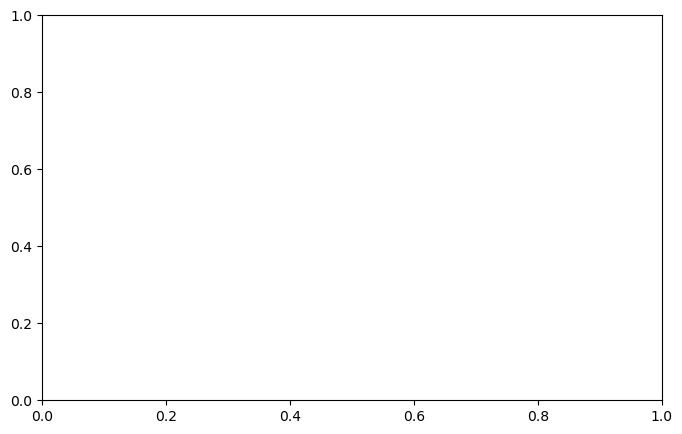

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

summed_dict = {}
for i in range(1001):
   if i in [1,10,100,500,1000]:
       print('i', i)   
       data_dict = get_sensitivity_data(i*np.ones(7))
       # data_dict = i*np.ones(7)
       summed_dict[i] = data_dict


C:\Users\atzeh\AppData\Local\Temp\ipykernel_29552\1755639895.py:13: RuntimeWarning: invalid value encountered in scalar divide
  vmin = (data_dict[values]['output_rf'][0][-1] -basic)/basic*100
C:\Users\atzeh\AppData\Local\Temp\ipykernel_29552\1755639895.py:14: RuntimeWarning: invalid value encountered in scalar divide
  vmean = (data_dict[values]['output_rf'][1][-1]-basic)/basic*100
C:\Users\atzeh\AppData\Local\Temp\ipykernel_29552\1755639895.py:15: RuntimeWarning: invalid value encountered in scalar divide
  vmax = (data_dict[values]['output_rf'][2][-1] -basic)/basic*100


0 Stratospheric CH$_4$ distribution nan nan
1 CH$_{4, ref}$ nan nan
2 AoA nan nan
3 y$_{SWV}$ nan nan
4 Radiative sensitivity nan nan
0 Stratospheric CH$_4$ distribution 35.41543901001767 -35.38597525044196
1 CH$_{4, ref}$ -8.603417796110785 8.544490276959339
2 AoA -3.918680023571007 0.7955215085444935
3 y$_{SWV}$ -95.6982911019446 31.879787860931046
4 Radiative sensitivity -9.988214496169714 10.017678255745437
0 Stratospheric CH$_4$ distribution 11.371371990841011 -11.48173360562741
1 CH$_{4, ref}$ -2.787920044557206 2.7518204509354884
2 AoA -1.274831363326936 0.25579140623388585
3 y$_{SWV}$ -31.30041050395032 10.239907585040331
4 Radiative sensitivity -10.000618850176366 9.999587433215751
0 Stratospheric CH$_4$ distribution 7.888909195776077 -8.565603245093305
1 CH$_{4, ref}$ -2.024860376964384 1.9645726573829927
2 AoA -0.9211678728166361 0.1844234571447046
3 y$_{SWV}$ -24.71725296869548 7.131277696154642
4 Radiative sensitivity -10.000166147258675 9.999928794032002


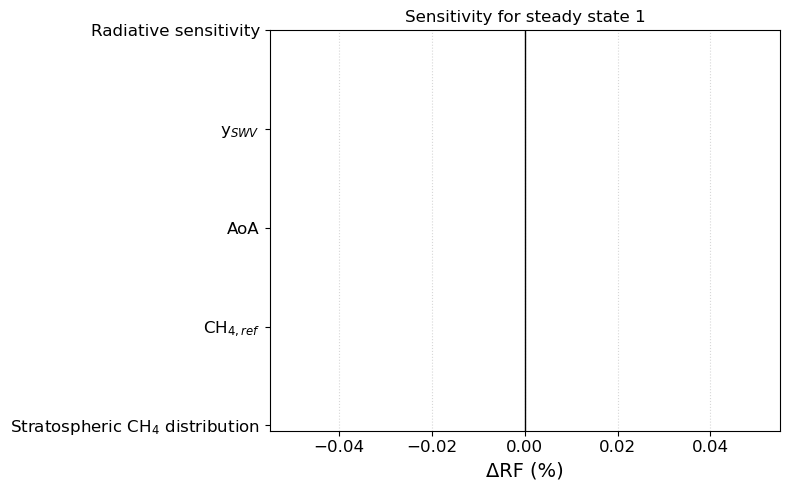

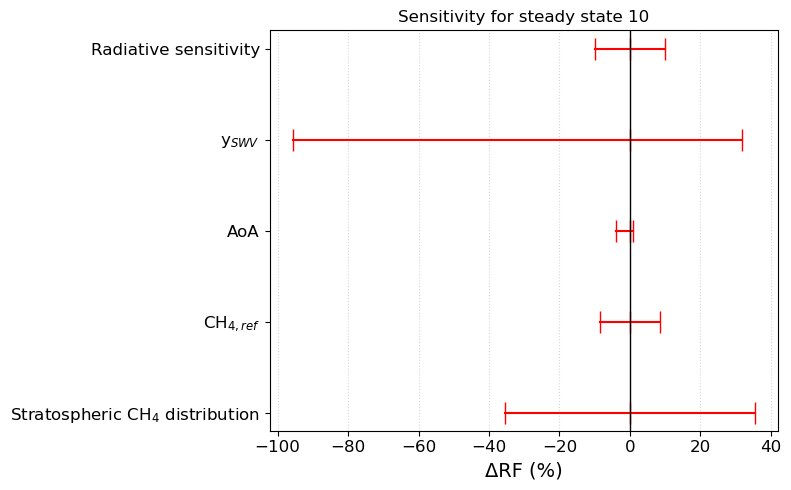

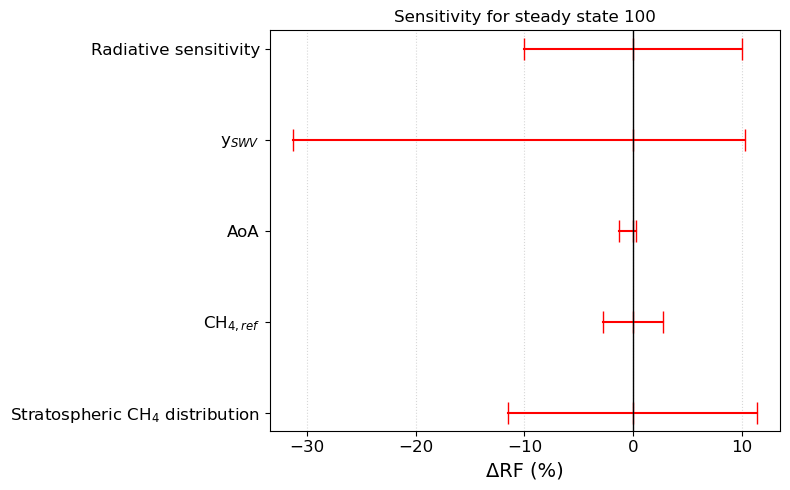

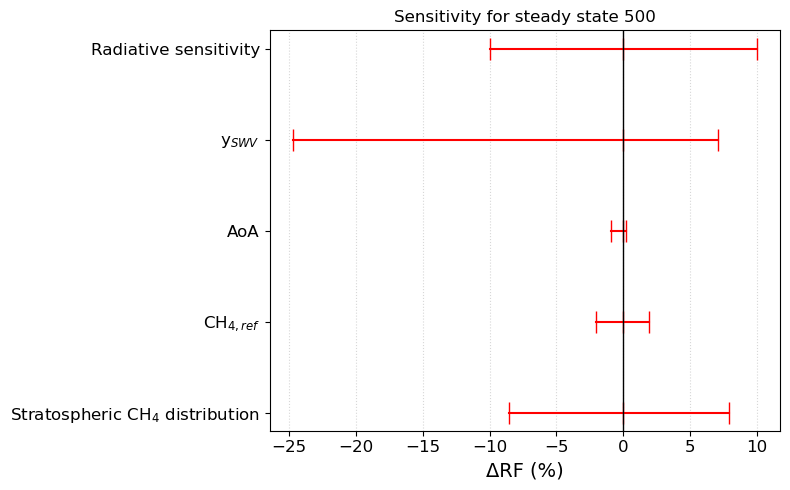

In [22]:


for key in summed_dict.keys():
    data_dict = summed_dict[key]
    if key == 0:
        continue
    fig, ax = plt.subplots(figsize=(8, 5))

    for i, values in enumerate(data_dict):
        # if values == r'CH$_4$base':
        #     q= 2
        # else:
        #     q=1
        basic = data_dict[values]['output_rf'][1][-1]
        vmin = (data_dict[values]['output_rf'][0][-1] -basic)/basic*100
        vmean = (data_dict[values]['output_rf'][1][-1]-basic)/basic*100
        vmax = (data_dict[values]['output_rf'][2][-1] -basic)/basic*100
        print(i, values, vmin,vmax)
    
        # Horizontal line (range)
        ax.plot([vmin, vmean, vmax], [i, i, i], '-', marker='|', markersize=16, color='red')

    # Formatting
    ax.set_yticks(range(len(data_dict)))
    ax.set_yticklabels(data_dict.keys(),fontsize=14)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlabel("ΔRF (%)",fontsize=14)
    ax.grid(True, axis="x", linestyle=":", alpha=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"Sensitivity for steady state {key}")
    plt.tight_layout()
plt.show()

# This means that the ch4 input does influence the sensitivity in this way, but making a MC analysis is of no use as then one should define a range from which thes inputs should be taken, and that is very arbitrary.

# 

# Next, a proper parameter range independent sensitivity could be performed...
But it does not really add value, i believe, it mostly implies linearity where there isnt...



In [23]:
data_dict

{'Stratospheric CH$_4$ distribution': {'input': [0.85, 1, 1.15],
  'output_mass': [array([  0.  ,   8.42,  32.21,  72.02, 127.93, 127.93, 127.93]),
   array([  0.  ,   9.26,  33.81,  70.72, 115.14, 115.14, 115.14]),
   array([  0.  ,  10.61,  35.  ,  67.48, 102.35, 102.35, 102.35])],
  'output_rf': [array([0.       , 0.0031802, 0.0135985, 0.0288059, 0.045455 , 0.045455 ,
          0.045455 ]),
   array([0.       , 0.0035659, 0.0142654, 0.0283528, 0.0421313, 0.0421313,
          0.0421313]),
   array([0.       , 0.00418  , 0.0147562, 0.0272128, 0.0385225, 0.0385225,
          0.0385225])]},
 'CH$_{4, ref}$': {'input': [1.758, 1.772, 1.786],
  'output_mass': [array([  0.  ,   9.79,  33.42,  68.85, 112.02, 112.02, 112.02]),
   array([  0.  ,   9.26,  33.81,  70.72, 115.14, 115.14, 115.14]),
   array([  0.  ,   8.84,  34.11,  72.47, 118.22, 118.22, 118.22])],
  'output_rf': [array([0.       , 0.003805 , 0.0141039, 0.027698 , 0.0412782, 0.0412782,
          0.0412782]),
   array([0.       ,

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

for i, values in enumerate(data_dict):
    # if values == r'CH$_4$base':
    #     q= 2
    # else:
    #     q=1
    basic = data_dict[values]['output_rf'][1][-1]
    vmin = (data_dict[values]['output_rf'][0][-1] -basic)/basic*100
    vmean = (data_dict[values]['output_rf'][1][-1]-basic)/basic*100
    vmax = (data_dict[values]['output_rf'][2][-1] -basic)/basic*100
    print(i, values, vmin,vmax)

    # Horizontal line (range)
    ax.plot([vmin, vmean, vmax], [i, i, i], '-', marker='|', markersize=16, color='red')

# Formatting
ax.set_yticks(range(len(data_dict)))
ax.set_yticklabels(data_dict.keys(),fontsize=14)
ax.axvline(0, color='black', linewidth=1)
ax.set_xlabel("ΔRF (%)",fontsize=14)
ax.grid(True, axis="x", linestyle=":", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title(f"Sensitivity for steady state")
plt.tight_layout()
plt.show()